In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [29]:
y_max = 8

Всего файлов: 2000
--------------
Среднее время выполнения для Tree Sitter: 1.87 мс
Среднее время выполнения для Pyright: 0.93 мс
Среднее время выполнения для antlr: 1.75 мс


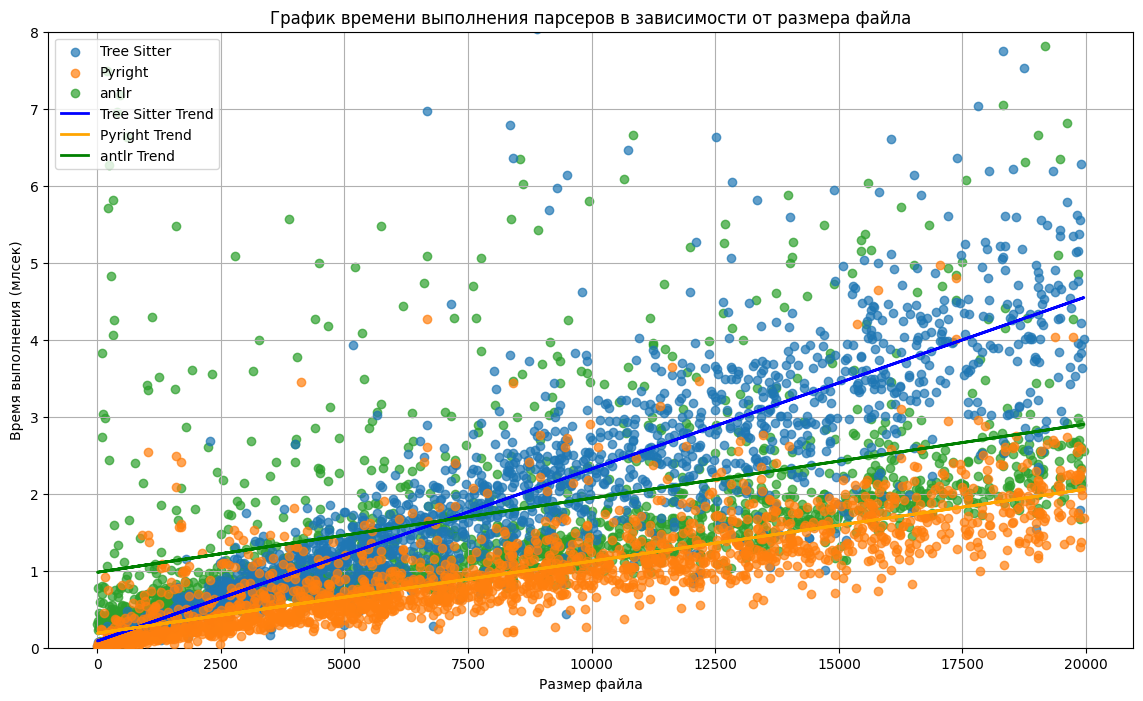

In [30]:


# Чтение данных из JSON-файла
with open('results.json', 'r') as f:
    data = json.load(f)

# Инициализация списков для хранения данных времени выполнения для каждого парсера
tree_sitter_times = []
pyright_times = []
antlr_times = []
sizes = []

# Итерация по данным и заполнение списков времени выполнения и размеров
for item in data:
    tree_sitter_times.append(item['tree-sitterTime'])
    pyright_times.append(item['pyrightTime'])
    antlr_times.append(item['antlrTime'])
    sizes.append(item['size'])


# Вычисление средних значений
mean_tree_sitter = np.mean(tree_sitter_times)
mean_pyright = np.mean(pyright_times)
mean_antlr = np.mean(antlr_times)



# вывод инфы
print(f'Всего файлов: {len(tree_sitter_times)}')
print('--------------')
print(f'Среднее время выполнения для Tree Sitter: {mean_tree_sitter:.2f} мс')
print(f'Среднее время выполнения для Pyright: {mean_pyright:.2f} мс')
print(f'Среднее время выполнения для antlr: {mean_antlr:.2f} мс')

# Построение графика времени выполнения парсеров в зависимости от размера
plt.figure(figsize=(14, 8))  # Увеличенный размер фигуры
plt.scatter(sizes, tree_sitter_times, label='Tree Sitter', alpha=0.7, zorder=2)
plt.scatter(sizes, pyright_times, label='Pyright', alpha=0.7, zorder=3)
plt.scatter(sizes, antlr_times, label='antlr', alpha=0.7, zorder=1)

# Линии тренда
z_tree_sitter = np.polyfit(sizes, tree_sitter_times, 1)
p_tree_sitter = np.poly1d(z_tree_sitter)
plt.plot(sizes, p_tree_sitter(sizes), color='blue', linestyle='-', linewidth=2, label='Tree Sitter Trend', zorder=4)

z_pyright = np.polyfit(sizes, pyright_times, 1)
p_pyright = np.poly1d(z_pyright)
plt.plot(sizes, p_pyright(sizes), color='orange', linestyle='-', linewidth=2, label='Pyright Trend', zorder=4)

z_antlr = np.polyfit(sizes, antlr_times, 1)
p_antlr = np.poly1d(z_antlr)
plt.plot(sizes, p_antlr(sizes), color='green', linestyle='-', linewidth=2, label='antlr Trend', zorder=4)

plt.xlabel('Размер файла')
plt.ylabel('Время выполнения (млсек)')
plt.title('График времени выполнения парсеров в зависимости от размера файла')
plt.legend()
plt.grid(True)
plt.ylim(0, y_max)  # Ограничение по оси Y для исключения выбросов
plt.show()

Медианное время выполнения для Tree Sitter: 1.57 мс
Медианное время выполнения для Pyright: 0.82 мс
Медианное время выполнения для antlr: 1.24 мс
--------------
Standard deviation для Tree Sitter: 1.44
Standard deviation для Pyright: 0.66
Standard deviation для antlr: 2.50
--------------
Корреляция (размер, время выполнения) для Tree Sitter: 0.87
Корреляция (размер, время выполнения) для Pyright: 0.79
Корреляция (размер, время выполнения) для antlr: 0.22


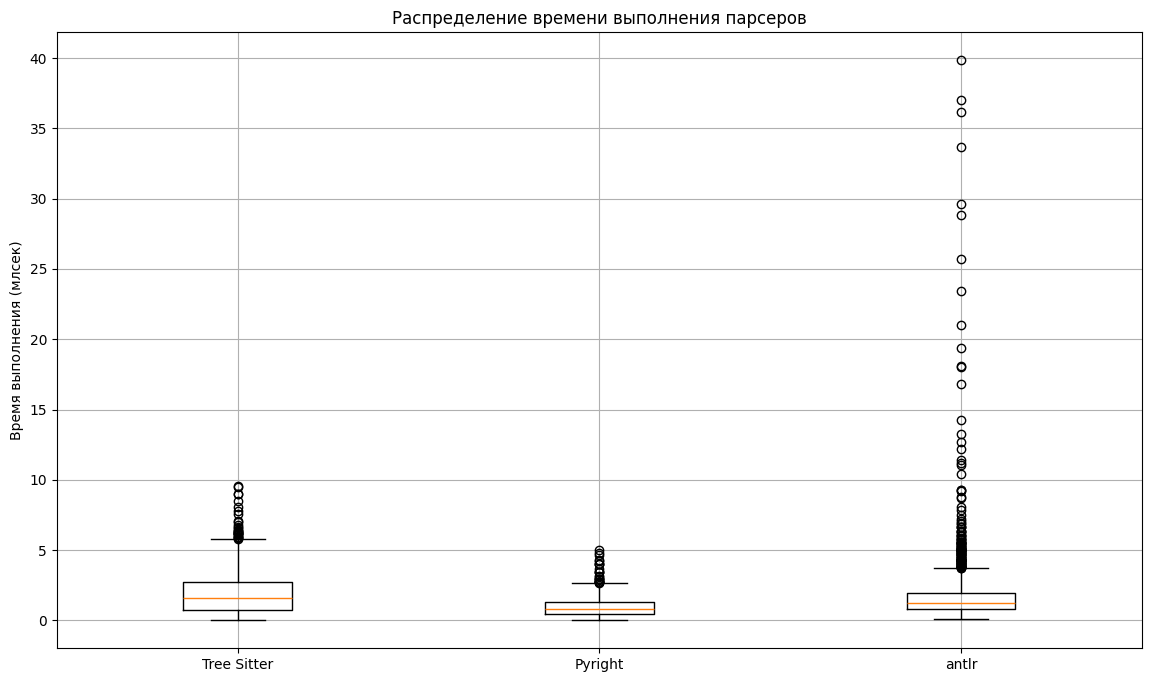

In [31]:

# Чтение данных из JSON-файла
with open('results.json', 'r') as f:
    data = json.load(f)

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Вычисление медианных значений
median_tree_sitter = np.median(df['tree-sitterTime'])
median_pyright = np.median(df['pyrightTime'])
median_antlr = np.median(df['antlrTime'])

# Вычисление дисперсии и стандартного отклонения
std_tree_sitter = np.std(df['tree-sitterTime'])
std_pyright = np.std(df['pyrightTime'])
std_antlr = np.std(df['antlrTime'])

# Коэффициент корреляции
corr_tree_sitter = np.corrcoef(df['size'], df['tree-sitterTime'])[0, 1]
corr_pyright = np.corrcoef(df['size'], df['pyrightTime'])[0, 1]
corr_antlr = np.corrcoef(df['size'], df['antlrTime'])[0, 1]

# вывод инфы
print(f'Медианное время выполнения для Tree Sitter: {median_tree_sitter:.2f} мс')
print(f'Медианное время выполнения для Pyright: {median_pyright:.2f} мс')
print(f'Медианное время выполнения для antlr: {median_antlr:.2f} мс')
print('--------------')
print(f'Standard deviation для Tree Sitter: {std_tree_sitter:.2f}')
print(f'Standard deviation для Pyright: {std_pyright:.2f}')
print(f'Standard deviation для antlr: {std_antlr:.2f}')
print('--------------')
print(f'Корреляция (размер, время выполнения) для Tree Sitter: {corr_tree_sitter:.2f}')
print(f'Корреляция (размер, время выполнения) для Pyright: {corr_pyright:.2f}')
print(f'Корреляция (размер, время выполнения) для antlr: {corr_antlr:.2f}')

# Построение боксплотов
plt.figure(figsize=(14, 8))
plt.boxplot([df['tree-sitterTime'], df['pyrightTime'], df['antlrTime']], labels=['Tree Sitter', 'Pyright', 'antlr'])
plt.ylabel('Время выполнения (млсек)')
plt.title('Распределение времени выполнения парсеров')
plt.grid(True)
plt.show()
